## SMS-Spam-Detection

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [6]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

##### Stages
- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Model Evaluation
- Improvements depending on evaluation
- creating a website
- Deployment

### 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Lets rename the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [21]:
df['target']=LE.fit_transform(df['target'])

In [25]:
#Checking for duplicates
df.duplicated().sum()

403

In [27]:
#Removing duplicates 
df=df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

## 2. EDA

In [30]:
df['target'].value_counts() 

0    4516
1     653
Name: target, dtype: int64

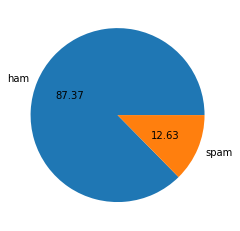

In [31]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

From the above chart we  can see that the dataset is imbalanced

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudhakar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
df['num_characters']=df['text'].apply(len) #This gives the number of letters in the text

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #This gives the number of words in the text

In [42]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #This gives the number of sentences in the text

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [48]:
#For ham messages
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [49]:
#For spam messages
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


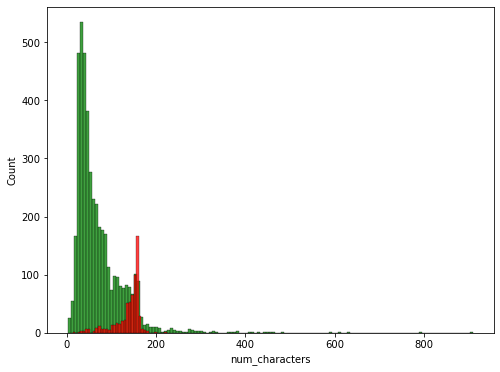

In [65]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_characters'],color='g')
sns.histplot(df[df['target']==1]['num_characters'],color='r')
plt.show()

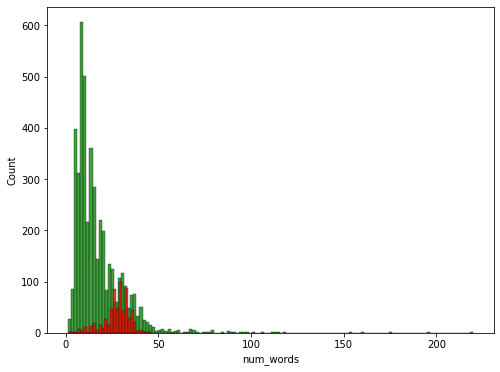

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_words'],color='g')
sns.histplot(df[df['target']==1]['num_words'],color='r')
plt.show()

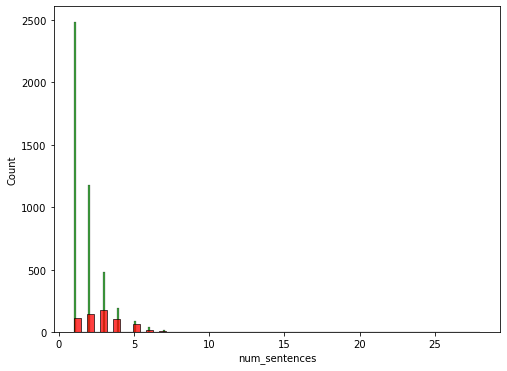

In [67]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target']==0]['num_sentences'],color='g')
sns.histplot(df[df['target']==1]['num_sentences'],color='r')
plt.show()

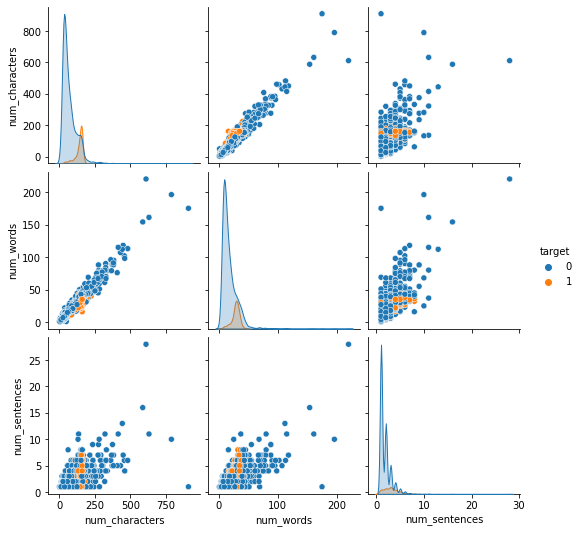

In [69]:
sns.pairplot(df,hue='target')
plt.show()

From the above histograms and pairplots we can notice alot of outliers present in the dataset

<AxesSubplot:>

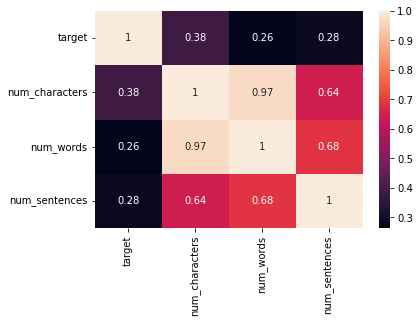

In [70]:
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can notice that there is multicollinearity between the columns num_characters,num_words and num_sentences hence lets make use of any one column out of these 3 (ie., lets retain num_characters)

## 3. Data Prepprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and punctuations
- Stemming

In [91]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
#nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhakar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [95]:
# Lets create a function to do all the above preprocessing technique

def transform_text(text):
    #converting the text to lower case
    text=text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    
    #to remove special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    #removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [97]:
df['transformed_text']=df['text'].apply(transform_text)

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [100]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [136]:
from wordcloud import WordCloud
wc=WordCloud(width=1500,height=1000,min_font_size=10,background_color='white')

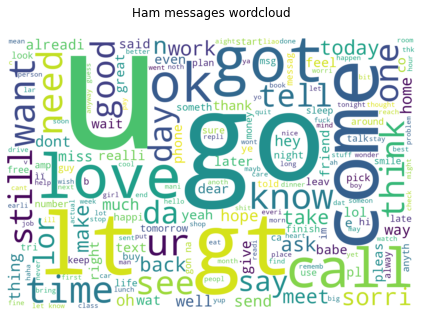

In [144]:
plt.figure(figsize=(14,5))
wc_ham=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(wc_ham,interpolation='bilinear')
plt.axis("off")
plt.title('Ham messages wordcloud\n')
plt.show()

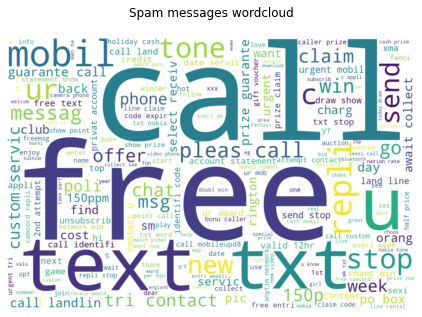

In [146]:
plt.figure(figsize=(14,5))
wc_spam=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.axis("off")
plt.imshow(wc_spam,interpolation='bilinear')
plt.title('Spam messages wordcloud\n')
plt.show()

In [167]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)        

In [168]:
len(ham_corpus)

35394

In [170]:
from collections import Counter

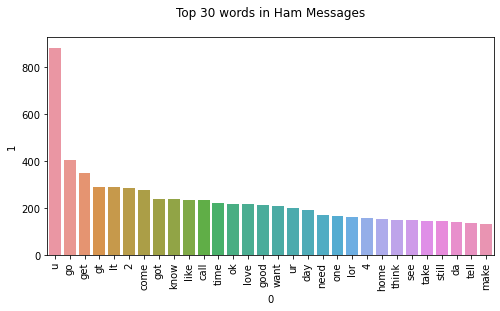

In [171]:
plt.figure(figsize=(8,4))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Ham Messages\n')
plt.show()

In [172]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)        

In [173]:
len(spam_corpus)

9939

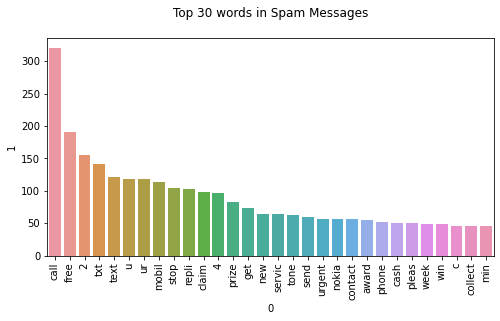

In [176]:
plt.figure(figsize=(8,4))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 words in Spam Messages\n')
plt.show()

## 4. Model Building

In [178]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


From the above dataframe we can see textual data in some of the columns so lets convert required columns to numeric data using  text vectorization 

In [214]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [181]:
X=cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [182]:
X.shape

(5169, 6708)

In [184]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
y.shape

(5169,)

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [220]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [221]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#### GaussianNB

In [205]:
gnb.fit(X_train,y_train)

GaussianNB()

In [206]:
y_preds1=gnb.predict(X_test)
y_preds1

array([0, 0, 1, ..., 1, 0, 0])

In [207]:
print('accuracy_score : ',accuracy_score(y_test,y_preds1))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds1))
print('\nprecision_score : ',precision_score(y_test,y_preds1))

accuracy_score :  0.8684719535783365

confusion_matrix :
 [[772 117]
 [ 19 126]]

precision_score :  0.5185185185185185


#### MultinomialNB

In [208]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [209]:
y_preds2=mnb.predict(X_test)
y_preds2

array([0, 0, 0, ..., 1, 0, 0])

In [210]:
print('accuracy_score : ',accuracy_score(y_test,y_preds2))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds2))
print('\nprecision_score : ',precision_score(y_test,y_preds2))

accuracy_score :  0.9738878143133463

confusion_matrix :
 [[872  17]
 [ 10 135]]

precision_score :  0.8881578947368421


#### BernoulliNB

In [211]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [212]:
y_preds3=bnb.predict(X_test)
y_preds3

array([0, 1, 0, ..., 1, 0, 0])

In [213]:
print('accuracy_score : ',accuracy_score(y_test,y_preds3))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds3))
print('\nprecision_score : ',precision_score(y_test,y_preds3))

accuracy_score :  0.9661508704061895

confusion_matrix :
 [[885   4]
 [ 31 114]]

precision_score :  0.9661016949152542


- - -

### Using tfidf vectorizer

In [284]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [285]:
X.shape

(5169, 3000)

In [319]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [320]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### GaussianNB

In [321]:
gnb.fit(X_train,y_train)
y_preds11=gnb.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_preds11))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds11))
print('\nprecision_score : ',precision_score(y_test,y_preds11))

accuracy_score :  0.8684719535783365

confusion_matrix :
 [[774 115]
 [ 21 124]]

precision_score :  0.5188284518828452


#### MultinomialNB

In [322]:
mnb.fit(X_train,y_train)
y_preds22=mnb.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_preds22))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds22))
print('\nprecision_score : ',precision_score(y_test,y_preds22))

accuracy_score :  0.9748549323017408

confusion_matrix :
 [[884   5]
 [ 21 124]]

precision_score :  0.9612403100775194


#### BernoulliNB

In [323]:
bnb.fit(X_train,y_train)
y_preds33=bnb.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_preds33))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds33))
print('\nprecision_score : ',precision_score(y_test,y_preds33))

accuracy_score :  0.9729206963249516

confusion_matrix :
 [[884   5]
 [ 23 122]]

precision_score :  0.9606299212598425


**On comparing the above models above we can see good results using tfidf vectorizer --> mnb**

####  Lets compare using other models too!

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [325]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [326]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [327]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [328]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8597678916827853
Precision -  0.0
For  KN
Accuracy -  0.874274661508704
Precision -  0.6829268292682927
For  NB
Accuracy -  0.9748549323017408
Precision -  0.9612403100775194
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8245614035087719
For  LR
Accuracy -  0.9680851063829787
Precision -  0.9516129032258065
For  RF
Accuracy -  0.971953578336557
Precision -  0.9833333333333333
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9104477611940298
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8571428571428571
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.96875
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9272727272727272
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9307692307692308


#### Performance before using max_features parameter

In [239]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.976789,0.991870
5,RF,0.969052,0.991304
2,NB,0.961315,0.990654
10,xgb,0.970986,0.952756
9,GBDT,0.950677,0.951923
0,SVC,0.972921,0.946565
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [240]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.976789
2,RF,Accuracy,0.969052
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.970986
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.972921
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


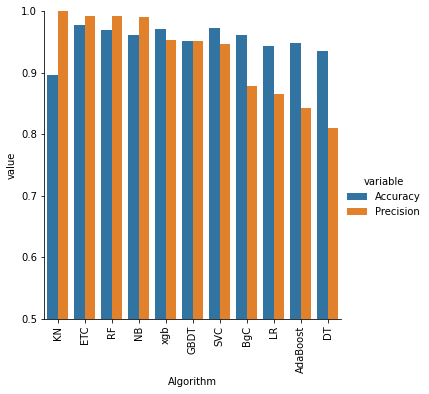

In [252]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#### Lets improve the model by using the max_features parameter of TfIdf

In [296]:
tfidf = TfidfVectorizer(max_features=3000)

In [297]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.973888,0.983607
0,SVC,0.976789,0.954887
9,GBDT,0.946809,0.950000
10,xgb,0.968085,0.924242
7,BgC,0.961315,0.883212
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [298]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.896518,1.000000,0.904255,1.000000
1,ETC,0.976789,0.991870,0.977756,0.984127
2,RF,0.969052,0.991304,0.973888,0.983607
3,NB,0.961315,0.990654,0.972921,0.991597
4,xgb,0.970986,0.952756,0.968085,0.924242
5,GBDT,0.950677,0.951923,0.946809,0.950000
6,SVC,0.972921,0.946565,0.976789,0.954887
7,BgC,0.961315,0.877698,0.961315,0.883212
8,LR,0.943907,0.865546,0.946809,0.868852
9,AdaBoost,0.947776,0.842105,0.950677,0.867188


#### Lets apply scaling and check the results

In [301]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [302]:
X=scaler.fit_transform(X)

In [316]:
X.shape

(5169, 3000)

In [313]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.904255,1.000000
8,ETC,0.977756,0.984127
5,RF,0.973888,0.983607
2,NB,0.977756,0.955224
9,GBDT,0.946809,0.950000
10,xgb,0.968085,0.924242
4,LR,0.962282,0.920635
0,SVC,0.968085,0.905797
7,BgC,0.961315,0.883212
6,AdaBoost,0.950677,0.867188


In [314]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.896518,1.000000,0.904255,1.000000,0.904255,1.000000
1,ETC,0.976789,0.991870,0.977756,0.984127,0.977756,0.984127
2,RF,0.969052,0.991304,0.973888,0.983607,0.973888,0.983607
3,NB,0.961315,0.990654,0.972921,0.991597,0.977756,0.955224
4,xgb,0.970986,0.952756,0.968085,0.924242,0.968085,0.924242
5,GBDT,0.950677,0.951923,0.946809,0.950000,0.946809,0.950000
6,SVC,0.972921,0.946565,0.976789,0.954887,0.968085,0.905797
7,BgC,0.961315,0.877698,0.961315,0.883212,0.961315,0.883212
8,LR,0.943907,0.865546,0.946809,0.868852,0.962282,0.920635
9,AdaBoost,0.947776,0.842105,0.950677,0.867188,0.950677,0.867188


#### Lets append and see num_characters col to X to check whether there will be any improvement

In [317]:
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [318]:
X.shape

(5169, 3001)

In [329]:
new1_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new1_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
5,RF,0.971954,0.983333
8,ETC,0.975822,0.968750
2,NB,0.974855,0.961240
4,LR,0.968085,0.951613
10,xgb,0.968085,0.930769
9,GBDT,0.950677,0.927273
6,AdaBoost,0.966151,0.910448
7,BgC,0.961315,0.857143
3,DT,0.931335,0.824561
1,KN,0.874275,0.682927


In [331]:
new11_df=new_df_scaled.merge(new1_df,on='Algorithm')
new11_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.896518,1.000000,0.904255,1.000000,0.904255,1.000000,0.874275,0.682927
1,ETC,0.976789,0.991870,0.977756,0.984127,0.977756,0.984127,0.975822,0.968750
2,RF,0.969052,0.991304,0.973888,0.983607,0.973888,0.983607,0.971954,0.983333
3,NB,0.961315,0.990654,0.972921,0.991597,0.977756,0.955224,0.974855,0.961240
4,xgb,0.970986,0.952756,0.968085,0.924242,0.968085,0.924242,0.968085,0.930769
5,GBDT,0.950677,0.951923,0.946809,0.950000,0.946809,0.950000,0.950677,0.927273
6,SVC,0.972921,0.946565,0.976789,0.954887,0.968085,0.905797,0.859768,0.000000
7,BgC,0.961315,0.877698,0.961315,0.883212,0.961315,0.883212,0.961315,0.857143
8,LR,0.943907,0.865546,0.946809,0.868852,0.962282,0.920635,0.968085,0.951613
9,AdaBoost,0.947776,0.842105,0.950677,0.867188,0.950677,0.867188,0.966151,0.910448


- **After trying all these methods too we dont find much improvisation in the results**
- **On Comparing the above result we see that NB with max_features=3000 gives good results compare to others**

#### Lets try VotingClassifier now

In [332]:
from sklearn.ensemble import VotingClassifier

In [333]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [335]:
vc = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [340]:
y_pred = vc.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Confusion_matrix :\n",confusion_matrix(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9709864603481625
Confusion_matrix :
 [[889   0]
 [ 30 115]]
Precision :  1.0


#### Lets try StackingClassifier now

In [341]:
from sklearn.ensemble import StackingClassifier

In [342]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [343]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [344]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Confusion_matrix :\n",confusion_matrix(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9748549323017408
Confusion_matrix :
 [[876  13]
 [ 13 132]]
Precision :  0.9103448275862069


---

#### Finally Selected Model

After trying all these methods we see that there is no much improvement hence lets use **mnb with tfdif->max_features=3000** as our best results giving model

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [347]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [348]:
X.shape

(5169, 3000)

In [349]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [350]:
y.shape

(5169,)

In [351]:
from sklearn.model_selection import train_test_split

In [360]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [358]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [361]:
mnb.fit(X_train,y_train)
y_preds=mnb.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_preds))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_preds))
print('\nprecision_score : ',precision_score(y_test,y_preds))

accuracy_score :  0.9729206963249516

confusion_matrix :
 [[888   1]
 [ 27 118]]

precision_score :  0.9915966386554622


In [362]:
import pickle

In [363]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))